# Capstone Project 1
## House price prediction
data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
data_directory = 'data/Zip_time_series.csv'
df = pd.read_csv(data_directory, parse_dates=True, index_col='Date')
df.shape()

(4383885, 75)

## 1. Data wrangling
This section aims to check data quality, and offers a first pass to correct data that are apparently wrong.The focus for this project is to make house price prediction for the western houston area. Therefore, only certain zip codes are selected.The zip codes selected for the project are: 
+ Saterlite cities:
++ Katy: [77493, 77494]
++ Sugarland: [77478, 77479, 77487, 77496, 77498]
++ Pearland: [77047, 77089, 77581, 77584, 77588]
+ Houston:
++ West University: [77005]
++ Rice Military: [77007]
++ Memorial: [77024]
++ Medical: [77025, 77054, 77030, 77004]
++ Heights: [77007, 77008, 77009]




### 1.1 Data importance check
+ when a column has too many null value, this column should be deleted.
+ for any categorical data, if the total number of one category significantly outweight the other categories combined, it is not a good indication of sale price and therefore is deleted.

In [182]:
# only certain zip codes are included in the analysis
katy = [77493, 77494]
sugarland = [77478, 77479, 77487, 77496, 77498]
pearland = [77047, 77089, 77581, 77584, 77588]
west_univ = [77005]
rice_mil = [77007]
memorial = [77024]
medical = [77025, 77054, 77030, 77004]
heights = [77007, 77008, 77009]
zip_codes = {'katy':katy,
            'pearland':pearland,
            'west_univ':west_univ,
            'rice_military':rice_mil,
            'memorial':memorial,
            'medical':medical,
            'heights':heights}

# extract data from df to df_zipcode
df_houston = []
for key, zip_code in zip_codes.items():
    for z in zip_code:
        df_houston.append(df[df['RegionName']==z])
df_houston = pd.concat(df_houston)
df_houston.index.min()

Timestamp('1996-04-30 00:00:00')

In [160]:
df.tail(25)

,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,99517,56.0,49.0,NaN,NaN,190.046296,NaN,NaN,179.102041,NaN,...,192300.0,174300.0,288200.0,301700.0,438900.0,1835.0,1767.0,1.370,1452.0,1863.0
2017-12-31,99518,NaN,NaN,NaN,NaN,165.583776,NaN,NaN,171.026616,NaN,...,135200.0,161900.0,232800.0,274100.0,300800.0,1699.0,1687.0,1.364,1467.0,1826.0
2017-12-31,99556,53.0,52.0,NaN,NaN,NaN,NaN,NaN,128.906250,NaN,...,NaN,NaN,182900.0,182900.0,274500.0,1278.0,1274.0,0.974,NaN,1271.0
2017-12-31,99567,51.0,42.0,NaN,NaN,206.250000,NaN,NaN,191.722459,NaN,...,278000.0,NaN,353900.0,355300.0,435400.0,2051.0,2020.0,1.208,1557.0,2050.0
2017-12-31,99577,156.0,120.0,NaN,NaN,184.573003,175.938489,NaN,182.781606,155.08844,...,251100.0,229600.0,329500.0,337300.0,427400.0,2015.0,1980.0,1.274,1665.0,2031.0
2017-12-31,99587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,181900.0,NaN,343100.0,428700.0,1758.0,1754.0,1.706,1566.0,2050.0
2017-12-31,99603,102.0,94.0,NaN,NaN,178.720779,NaN,NaN,185.347222,NaN,...,170000.0,NaN,NaN,NaN,351400.0,1479.0,1471.0,0.930,1453.0,1475.0
2017-12-31,99611,159.0,140.0,NaN,NaN,133.568905,126.693002,NaN,133.568905,NaN,...,156900.0,NaN,206000.0,206900.0,NaN,1357.0,1349.0,0.858,1279.0,1355.0
2017-12-31,99615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,229000.0,NaN,288200.0,289900.0,359100.0,NaN,NaN,NaN,NaN,NaN


From data exploration we know:
+ Alley, FireplaceQu, PoolQC, Fence and MiscFeature have too few data points, therefore should be deleted.

From above, there are only 6 properties with gravel driveway, the majority is with paved driveway, therefore Street should be deleted.

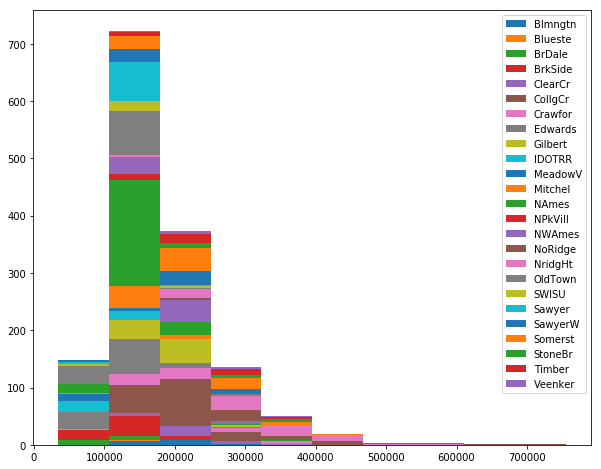

In [110]:
# check neighborhood effect on sale price
"""
df['Neighborhood'] = df['Neighborhood'].astype('category')
df_temp = df[['Neighborhood','SalePrice']]
df_temp = df_temp.groupby('Neighborhood')

dict_temp = {}
for key, value in df_temp:
    if key in dict_temp:
        dict_temp[key].append(value['SalePrice'].values)
    else:
        dict_temp[key] = value['SalePrice'].values
dict_keys = []
dict_values = []
for key, value in dict_temp.items():
    dict_keys.append(key)
    dict_values.append(value)

plt.hist(dict_values, bins=10, stacked=True)
plt.legend(dict_keys)
plt.show()
"""